In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
fedavg_df = pd.read_csv("./analiza/200/time_2024-08-31_15-29-48.csv")  # fedavg
fedprox_df = pd.read_csv("./analiza/200/time_2024-08-31_16-09-48.csv")  # fedprox
# df = pd.read_csv("time_2024-08-30_00-24-50.csv")  # scaffold

df = fedavg_df


# Display the first few rows of the data
print(fedavg_df.head())

                  function_name  execution_time
0   SAVE_INPUT:CONTEXT_GETTER:1        1.108560
1    GET_INPUT:CONTEXT_GETTER:1        2.032299
2      CALL_FN:CONTEXT_GETTER:1        0.000159
3  SAVE_OUTPUT:CONTEXT_GETTER:1        1.271584
4   GET_OUTPUT:CONTEXT_GETTER:1        1.649080


In [73]:
def modify_row(row):
    operation, component, iteration, *_ = row["function_name"].split(":")
    row["operation"] = operation
    row["component"] = component
    row["iteration"] = iteration
    row["operation_component"] = f"{operation}:{component}"
    return row


def add_row_data(df):
    df["operation"] = df["function_name"].apply(lambda x: x.split(":")[0])
    df = df[~df["operation"].isin(["ITERATION"])]
    return df.apply(modify_row, axis=1)


fedavg_iteration_df = fedavg_df[fedavg_df["function_name"].str.extract(r"^(ITERATION:.*)$")]


fedavg_df = add_row_data(fedavg_df)
fedprox_df = add_row_data(fedprox_df)


fedavg_iteration_df.head()

,function_name,execution_time,operation,component,iteration,operation_component
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def get_client_max_runtime(df):
    run_df = df

    # Group client handlers and get max execution time per iteration
    by_iteration_clients = run_df[run_df["component"] == "CLIENT_HANDLER"].groupby(["iteration", "operation"])
    client_handlers = by_iteration_clients["execution_time"].max()
    client_handlers = client_handlers.reset_index()
    client_handlers["component"] = "CLIENT_HANDLER_MAX"
    client_handlers["operation_component"] = client_handlers.apply(
        lambda x: f"{x['operation']}:CLIENT_HANDLER_MAX", axis=1
    )
    client_handlers["function_name"] = client_handlers.apply(
        lambda x: f"{x['operation_component']}:{x['iteration']}", axis=1
    )

    sum_clients = by_iteration_clients["execution_time"].sum().reset_index()

    sum_clients["component"] = "CLIENT_HANDLER_SUM"
    sum_clients["operation_component"] = sum_clients.apply(lambda x: f"{x['operation']}:CLIENT_HANDLER_SUM", axis=1)
    sum_clients["function_name"] = sum_clients.apply(lambda x: f"{x['operation_component']}:{x['iteration']}", axis=1)

    # Get other components
    other_components = df[~df["component"].isin(["CLIENT_HANDLER", "BACKEND"])]

    # Combine client handlers with other components
    combined_df = pd.concat([other_components, client_handlers, sum_clients])

    return combined_df


fedavg_df = get_client_max_runtime(fedavg_df)
fedprox_df = get_client_max_runtime(fedprox_df)
fedprox_df.head()

,function_name,execution_time,operation,component,iteration,operation_component
0,SAVE_INPUT:CONTEXT_GETTER:1,1.249516,SAVE_INPUT,CONTEXT_GETTER,1,SAVE_INPUT:CONTEXT_GETTER
1,GET_INPUT:CONTEXT_GETTER:1,2.367428,GET_INPUT,CONTEXT_GETTER,1,GET_INPUT:CONTEXT_GETTER
2,CALL_FN:CONTEXT_GETTER:1,0.004540,CALL_FN,CONTEXT_GETTER,1,CALL_FN:CONTEXT_GETTER
3,SAVE_OUTPUT:CONTEXT_GETTER:1,1.157969,SAVE_OUTPUT,CONTEXT_GETTER,1,SAVE_OUTPUT:CONTEXT_GETTER
4,GET_OUTPUT:CONTEXT_GETTER:1,1.810608,GET_OUTPUT,CONTEXT_GETTER,1,GET_OUTPUT:CONTEXT_GETTER


In [33]:
fedprox_df["operation"].unique()

array(['SAVE_INPUT', 'GET_INPUT', 'CALL_FN', 'SAVE_OUTPUT', 'GET_OUTPUT',
       'RUN'], dtype=object)

In [34]:
fedprox_df[fedprox_df["component"] == "CLIENT_HANDLER_SUM"]

,function_name,execution_time,operation,component,iteration,operation_component
0,CALL_FN:CLIENT_HANDLER_SUM:1,104.422209,CALL_FN,CLIENT_HANDLER_SUM,1,CALL_FN:CLIENT_HANDLER_SUM
1,GET_INPUT:CLIENT_HANDLER_SUM:1,73.577352,GET_INPUT,CLIENT_HANDLER_SUM,1,GET_INPUT:CLIENT_HANDLER_SUM
2,RUN:CLIENT_HANDLER_SUM:1,195.059213,RUN,CLIENT_HANDLER_SUM,1,RUN:CLIENT_HANDLER_SUM
3,SAVE_INPUT:CLIENT_HANDLER_SUM:1,0.778147,SAVE_INPUT,CLIENT_HANDLER_SUM,1,SAVE_INPUT:CLIENT_HANDLER_SUM
4,SAVE_OUTPUT:CLIENT_HANDLER_SUM:1,15.451013,SAVE_OUTPUT,CLIENT_HANDLER_SUM,1,SAVE_OUTPUT:CLIENT_HANDLER_SUM
5,CALL_FN:CLIENT_HANDLER_SUM:2,68.194383,CALL_FN,CLIENT_HANDLER_SUM,2,CALL_FN:CLIENT_HANDLER_SUM
6,GET_INPUT:CLIENT_HANDLER_SUM:2,54.538112,GET_INPUT,CLIENT_HANDLER_SUM,2,GET_INPUT:CLIENT_HANDLER_SUM
7,RUN:CLIENT_HANDLER_SUM:2,137.606271,RUN,CLIENT_HANDLER_SUM,2,RUN:CLIENT_HANDLER_SUM
8,SAVE_INPUT:CLIENT_HANDLER_SUM:2,0.576002,SAVE_INPUT,CLIENT_HANDLER_SUM,2,SAVE_INPUT:CLIENT_HANDLER_SUM
9,SAVE_OUTPUT:CLIENT_HANDLER_SUM:2,13.716747,SAVE_OUTPUT,CLIENT_HANDLER_SUM,2,SAVE_OUTPUT:CLIENT_HANDLER_SUM


In [19]:
# df["iteration"].unique()

# min_time = df.groupby("operation_component")["execution_time"].min()
# max_time = df.groupby("operation_component")["execution_time"].max()

# max_time

In [21]:
min_time = df.groupby("operation_component")["execution_time"].min()
max_time = df.groupby("operation_component")["execution_time"].max()

num_new_rows = 10 - len(df["iteration"].unique()) + 1


def create_row(row):
    new_row = row.copy()
    row_number = int(new_row["function_name"].split(":")[-1])
    new_row["function_name"] = ":".join(
        new_row["function_name"].split(":")[:-1]
        + [(str(row_number + num_new_rows if row_number != 11 else row_number))]
    )

    new_row = modify_row(new_row)
    operation_component = new_row["operation_component"]
    new_row["execution_time"] = np.random.uniform(min_time[operation_component], max_time[operation_component])
    return new_row


def preserve6(row):
    if row["iteration"] == "6":
        xd = row["function_name"].split(":")
        xd[2] = "11"
        row["function_name"] = ":".join(xd)
        modify_row(row)
    return row


new_df = df.apply(preserve6, axis=1).apply(create_row, axis=1)

# # Combine original and new data
augmented_df = pd.concat([df, new_df], ignore_index=True)

augmented_df

KeyError: 'operation_component'

In [96]:
fedavg_df.head()

,function_name,execution_time,operation,component,iteration,operation_component
0,SAVE_INPUT:CONTEXT_GETTER:1,1.108560,SAVE_INPUT,CONTEXT_GETTER,1,SAVE_INPUT:CONTEXT_GETTER
1,GET_INPUT:CONTEXT_GETTER:1,2.032299,GET_INPUT,CONTEXT_GETTER,1,GET_INPUT:CONTEXT_GETTER
2,CALL_FN:CONTEXT_GETTER:1,0.000159,CALL_FN,CONTEXT_GETTER,1,CALL_FN:CONTEXT_GETTER
3,SAVE_OUTPUT:CONTEXT_GETTER:1,1.271584,SAVE_OUTPUT,CONTEXT_GETTER,1,SAVE_OUTPUT:CONTEXT_GETTER
4,GET_OUTPUT:CONTEXT_GETTER:1,1.649080,GET_OUTPUT,CONTEXT_GETTER,1,GET_OUTPUT:CONTEXT_GETTER


# FAKE MORE DATA FOR DEVIATION

In [22]:
def simulate_data(df, num_simulations=10, variability=0.2):
    """
    Simulate multiple runs based on the original data.

    :param df: Original dataframe
    :param num_simulations: Number of simulated runs
    :param variability: Coefficient of variation for the simulated data
    :return: Dataframe with simulated data
    """
    # Convert all column names to strings
    df = df.rename(columns=lambda x: str(x))

    simulated_data = []

    for _ in range(num_simulations):
        sim_df = df.copy()
        for col in df.columns:
            if col == "execution_time":
                # Add random variation to each value
                variation = np.random.normal(1, variability, len(df))
                sim_df[col] = sim_df[col] * variation
        simulated_data.append(sim_df)

    return pd.concat(simulated_data, keys=range(num_simulations), names=["simulation", "original_index"])

# CPU 300 and 400

In [69]:
DECREASE_PERCENTAGE_300 = {
    "CLIENT_HANDLER_MAX": 0.20,
    "AGGREGATOR": 0.10,
    "DEFAULT": 0.05,
}

DECREASE_PERCENTAGE_400 = {
    "CLIENT_HANDLER_MAX": 0.15,
    "AGGREGATOR": 0.05,
    "DEFAULT": 0.02,
}


def decrease_execution_time(df, decrease_percentage):
    # iterate over rows. Decrease component execution time by 'component' name. Use decrease_percentage
    def modify_row(row):
        name = row["component"]
        factor = np.random.uniform(1 - decrease_percentage.get(name, decrease_percentage["DEFAULT"]), 0.99)
        row["execution_time"] = row["execution_time"] * factor
        return row

    return df.apply(modify_row, axis=1)


fedavg_df_300 = decrease_execution_time(fedavg_df, DECREASE_PERCENTAGE_300)
fedavg_df_400 = decrease_execution_time(fedavg_df_300, DECREASE_PERCENTAGE_400)
fedprox_df_300 = decrease_execution_time(fedprox_df, DECREASE_PERCENTAGE_300)
fedprox_df_400 = decrease_execution_time(fedprox_df_300, DECREASE_PERCENTAGE_400)
print(fedavg_df.head())
print("-----")
print(fedavg_df_300.head())
# fedprox_df_300 = ;

                  function_name  execution_time    operation       component  \
0   SAVE_INPUT:CONTEXT_GETTER:1        1.108560   SAVE_INPUT  CONTEXT_GETTER   
1    GET_INPUT:CONTEXT_GETTER:1        2.032299    GET_INPUT  CONTEXT_GETTER   
2      CALL_FN:CONTEXT_GETTER:1        0.000159      CALL_FN  CONTEXT_GETTER   
3  SAVE_OUTPUT:CONTEXT_GETTER:1        1.271584  SAVE_OUTPUT  CONTEXT_GETTER   
4   GET_OUTPUT:CONTEXT_GETTER:1        1.649080   GET_OUTPUT  CONTEXT_GETTER   

  iteration         operation_component  
0         1   SAVE_INPUT:CONTEXT_GETTER  
1         1    GET_INPUT:CONTEXT_GETTER  
2         1      CALL_FN:CONTEXT_GETTER  
3         1  SAVE_OUTPUT:CONTEXT_GETTER  
4         1   GET_OUTPUT:CONTEXT_GETTER  
-----
                  function_name  execution_time    operation       component  \
0   SAVE_INPUT:CONTEXT_GETTER:1        1.089608   SAVE_INPUT  CONTEXT_GETTER   
1    GET_INPUT:CONTEXT_GETTER:1        1.961535    GET_INPUT  CONTEXT_GETTER   
2      CALL_FN:CONTEX

/tmp/ipykernel_5385/570451582.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_5385/570451582.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



Summary Statistics for FedAvg:
       execution_time
count       16.000000
mean         8.009900
std          2.562605
min          6.040888
25%          6.457759
50%          7.167128
75%          7.705331
max         14.592519

Total Execution Time per Component:

Summary Statistics for FedProx:
       execution_time
count       16.000000
mean         8.880230
std          2.786228
min          6.437502
25%          7.385288
50%          8.082398
75%          8.736561
max         17.637810

Total Execution Time per Component:


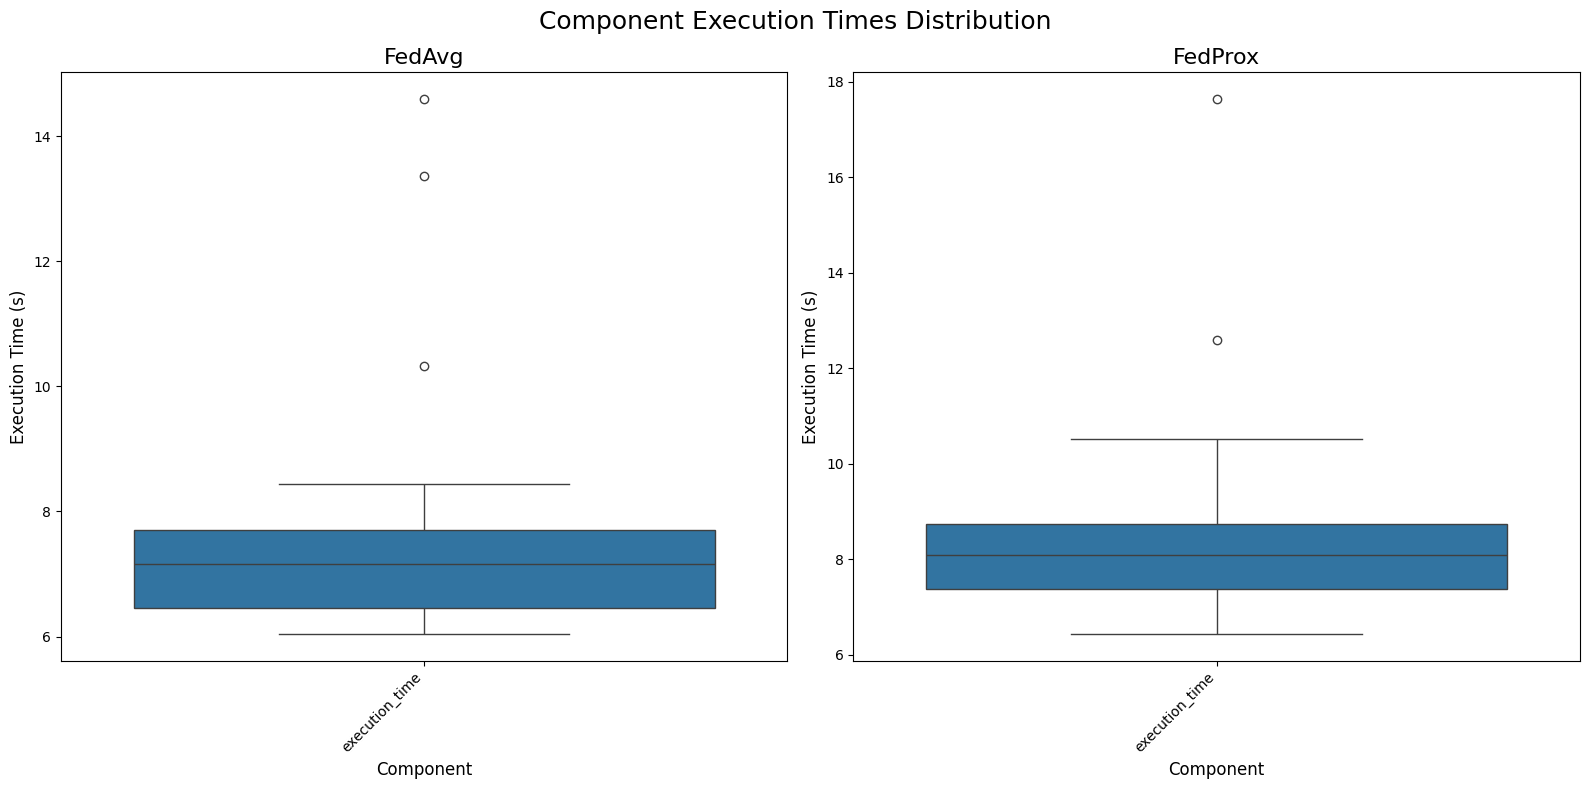

In [58]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# def graph_boxplot(df, ax, title):
#     # Create the box plot
#     sns.boxplot(data=df, ax=ax)

#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel('Component', fontsize=12)
#     ax.set_ylabel('Execution Time (s)', fontsize=12)

#     # Rotate x-axis labels for better readability
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#     # Print summary statistics
#     print(f"\nSummary Statistics for {title}:")
#     print(df.describe())

#     # Print total execution time per component
#     print("\nTotal Execution Time per Component:")

# # Create the figure and subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# # Plot for FedAvg
# graph_boxplot(fedavg_df, ax1, "FedAvg")

# # Plot for FedProx
# graph_boxplot(fedprox_df, ax2, "FedProx")

# # Add overall title
# fig.suptitle("Component Execution Times Distribution", fontsize=18)

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

# SHIT BAR PLOT

component  AGGREGATOR  CLIENT_HANDLER_MAX  CLIENT_HANDLER_SUM  CONTEXT_GETTER
count        6.000000            6.000000            6.000000        6.000000
mean         6.260082            8.097880          108.168740        7.001772
std          3.103931            5.301435           58.807272        1.649704
min          0.000000            0.000000            0.000000        6.040888
25%          7.134635            6.492028          104.606418        6.128665
50%          7.278839            7.164088          112.834717        6.393874
75%          7.426635           11.839953          144.396447        6.713899
max          8.440347           14.592519          166.562327       10.321163

Total Execution Time per Component:
component
CLIENT_HANDLER_SUM    649.012438
CLIENT_HANDLER_MAX     48.587278
CONTEXT_GETTER         42.010635
AGGREGATOR             37.560493
dtype: float64
component  AGGREGATOR  CLIENT_HANDLER_MAX  CLIENT_HANDLER_SUM  CONTEXT_GETTER
count        6.000000     

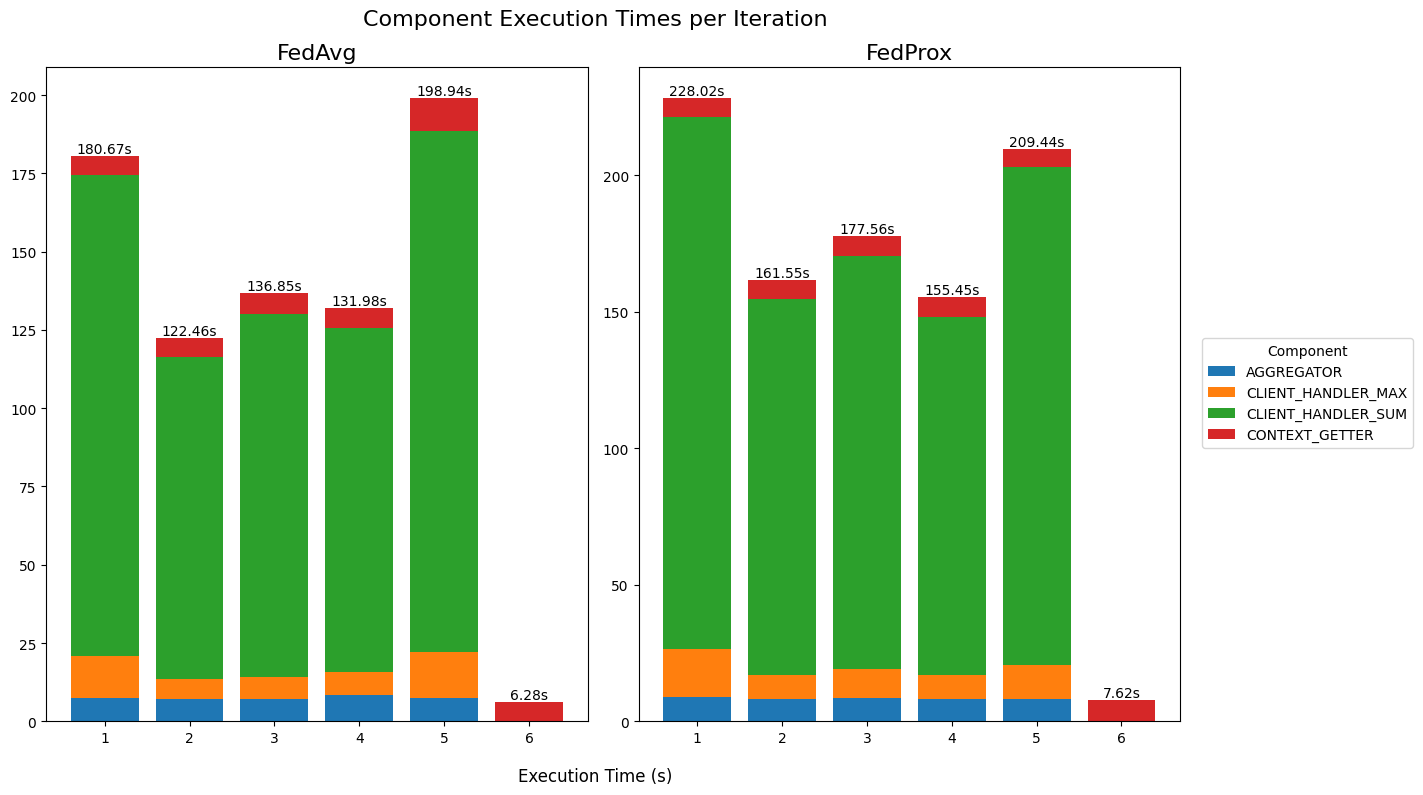

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))


def graph1(df, ax, title):
    df = df[df["operation"] == "RUN"]
    # Pivot the data
    pivot_df = df.pivot(index="iteration", columns="component", values="execution_time")

    # Fill NaN values with 0
    pivot_df = pivot_df.fillna(0)

    # Create the plot

    # Create the stacked bar chart
    bottom = np.zeros(len(pivot_df))
    for column in pivot_df.columns:
        ax.bar(pivot_df.index, pivot_df[column], bottom=bottom, label=column)
        bottom += pivot_df[column]

    # Add value labels on the bars
    for i, total in enumerate(bottom):
        ax.text(i, total, f"{total:.2f}s", ha="center", va="bottom")

    ax.set_title(title, fontsize=16)

    # Print summary statistics
    print(pivot_df.describe())

    # Print total execution time per component
    print("\nTotal Execution Time per Component:")
    print(pivot_df.sum().sort_values(ascending=False))

    # Customize the plot


graph1(fedavg_df, ax1, "FedAvg")
graph1(fedprox_df, ax2, "FedProx")
fig.suptitle("Component Execution Times per Iteration", fontsize=16)
fig.supxlabel("Iteration", fontsize=12)
fig.supxlabel("Execution Time (s)", fontsize=12)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="Component", bbox_to_anchor=(1.00, 0.5), loc="center left")
plt.tight_layout()
plt.show()

/tmp/ipykernel_32206/1481374483.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bar.get_x() + bar.get_width()/2, bottom[i] + height/2,
/tmp/ipykernel_32206/1481374483.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bar.get_x() + bar.get_width()/2, bottom[i] + height/2,
/tmp/ipykernel_32206/1481374483.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bar.get_x() + bar.get_width()/2, bottom[i] + he

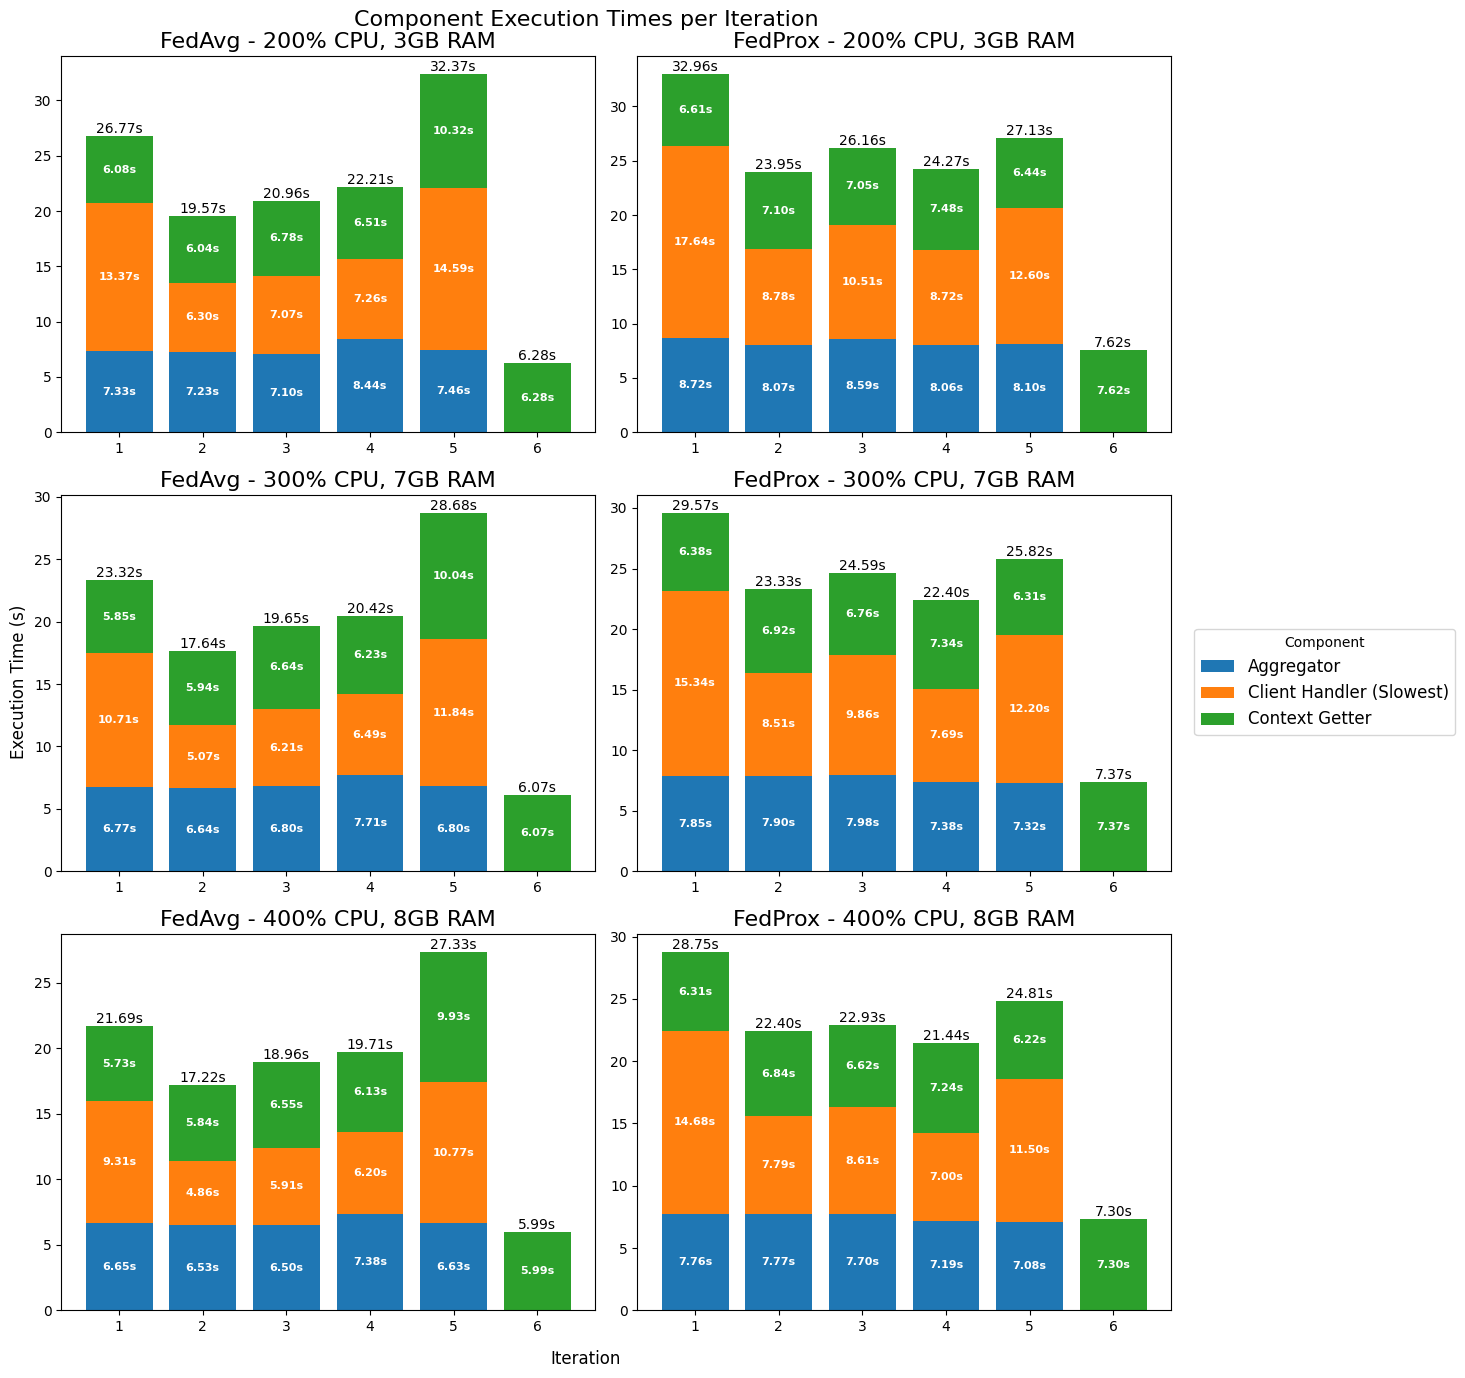

In [70]:
fig, axs = plt.subplots(3, 2, figsize=(12, 14))


rename_dict = {
    "CONTEXT_GETTER": "Context Getter",
    "CLIENT_HANDLER_MAX": "Client Handler (Slowest)",
    "AGGREGATOR": "Aggregator",
}


def graph2(df, ax, title):
    df = df[df["operation"] == "RUN"]
    df = df[df["component"] != "CLIENT_HANDLER_SUM"]

    df = df.replace({"component": rename_dict})
    # Pivot the data
    pivot_df = df.pivot(index="iteration", columns="component", values="execution_time")

    # Fill NaN values with 0
    pivot_df = pivot_df.fillna(0)

    # Create the plot

    # Create the stacked bar chart
    bottom = np.zeros(len(pivot_df))
    for column in pivot_df.columns:
        bars = ax.bar(pivot_df.index, pivot_df[column], bottom=bottom, label=column)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:  # Only add label if the segment has a non-zero height
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bottom[i] + height / 2,
                    f"{height:.2f}s",
                    ha="center",
                    va="center",
                    rotation="horizontal",
                    fontsize=8,
                    color="white",
                    fontweight="bold",
                )
        bottom += pivot_df[column]

    # Add value labels on the bars
    for i, total in enumerate(bottom):
        ax.text(i, total, f"{total:.2f}s", ha="center", va="bottom")

    ax.set_title(title, fontsize=16)

    # # Print summary statistics
    # print(pivot_df.describe())

    # # Print total execution time per component
    # print("\nTotal Execution Time per Component:")
    # print(pivot_df.sum().sort_values(ascending=False))

    # Customize the plot


graph2(fedavg_df, axs[0, 0], "FedAvg - 200% CPU, 3GB RAM")
graph2(fedprox_df, axs[0, 1], "FedProx - 200% CPU, 3GB RAM")
graph2(fedavg_df_300, axs[1, 0], "FedAvg - 300% CPU, 7GB RAM")
graph2(fedprox_df_300, axs[1, 1], "FedProx - 300% CPU, 7GB RAM")
graph2(fedavg_df_400, axs[2, 0], "FedAvg - 400% CPU, 8GB RAM")
graph2(fedprox_df_400, axs[2, 1], "FedProx - 400% CPU, 8GB RAM")
fig.suptitle("Component Execution Times per Iteration", fontsize=16)
fig.supxlabel("Iteration", fontsize=12)
fig.supylabel("Execution Time (s)", fontsize=12)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Component", bbox_to_anchor=(1.00, 0.5), loc="center left", fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)


component  Aggregator  CLIENT_HANDLER_SUM  Client Handler (Slowest)  \
count        6.000000            6.000000                  6.000000   
mean         0.626008           10.816874                  0.809788   
std          0.310393            5.880727                  0.530144   
min          0.000000            0.000000                  0.000000   
25%          0.713463           10.460642                  0.649203   
50%          0.727884           11.283472                  0.716409   
75%          0.742664           14.439645                  1.183995   
max          0.844035           16.656233                  1.459252   

component  Context Getter  
count            6.000000  
mean             0.700177  
std              0.164970  
min              0.604089  
25%              0.612867  
50%              0.639387  
75%              0.671390  
max              1.032116  

Total Cost per Component:
component
CLIENT_HANDLER_SUM          64.901244
Client Handler (Slowest)     4.85

/tmp/ipykernel_32206/1243591826.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)


component  Aggregator  CLIENT_HANDLER_SUM  Client Handler (Slowest)  \
count        6.000000            6.000000                  6.000000   
mean         0.657746           12.628031                  0.919054   
std          0.323380            6.627622                  0.541072   
min          0.000000            0.000000                  0.000000   
25%          0.766228           12.614667                  0.851630   
50%          0.767828           13.727804                  0.919606   
75%          0.804586           16.585699                  1.121952   
max          0.828284           18.530625                  1.656737   

component  Context Getter  
count            6.000000  
mean             0.669666  
std              0.044196  
min              0.611563  
25%              0.638181  
50%              0.672265  
75%              0.701602  
max              0.723705  

Total Cost per Component:
component
CLIENT_HANDLER_SUM          75.768185
Client Handler (Slowest)     5.51

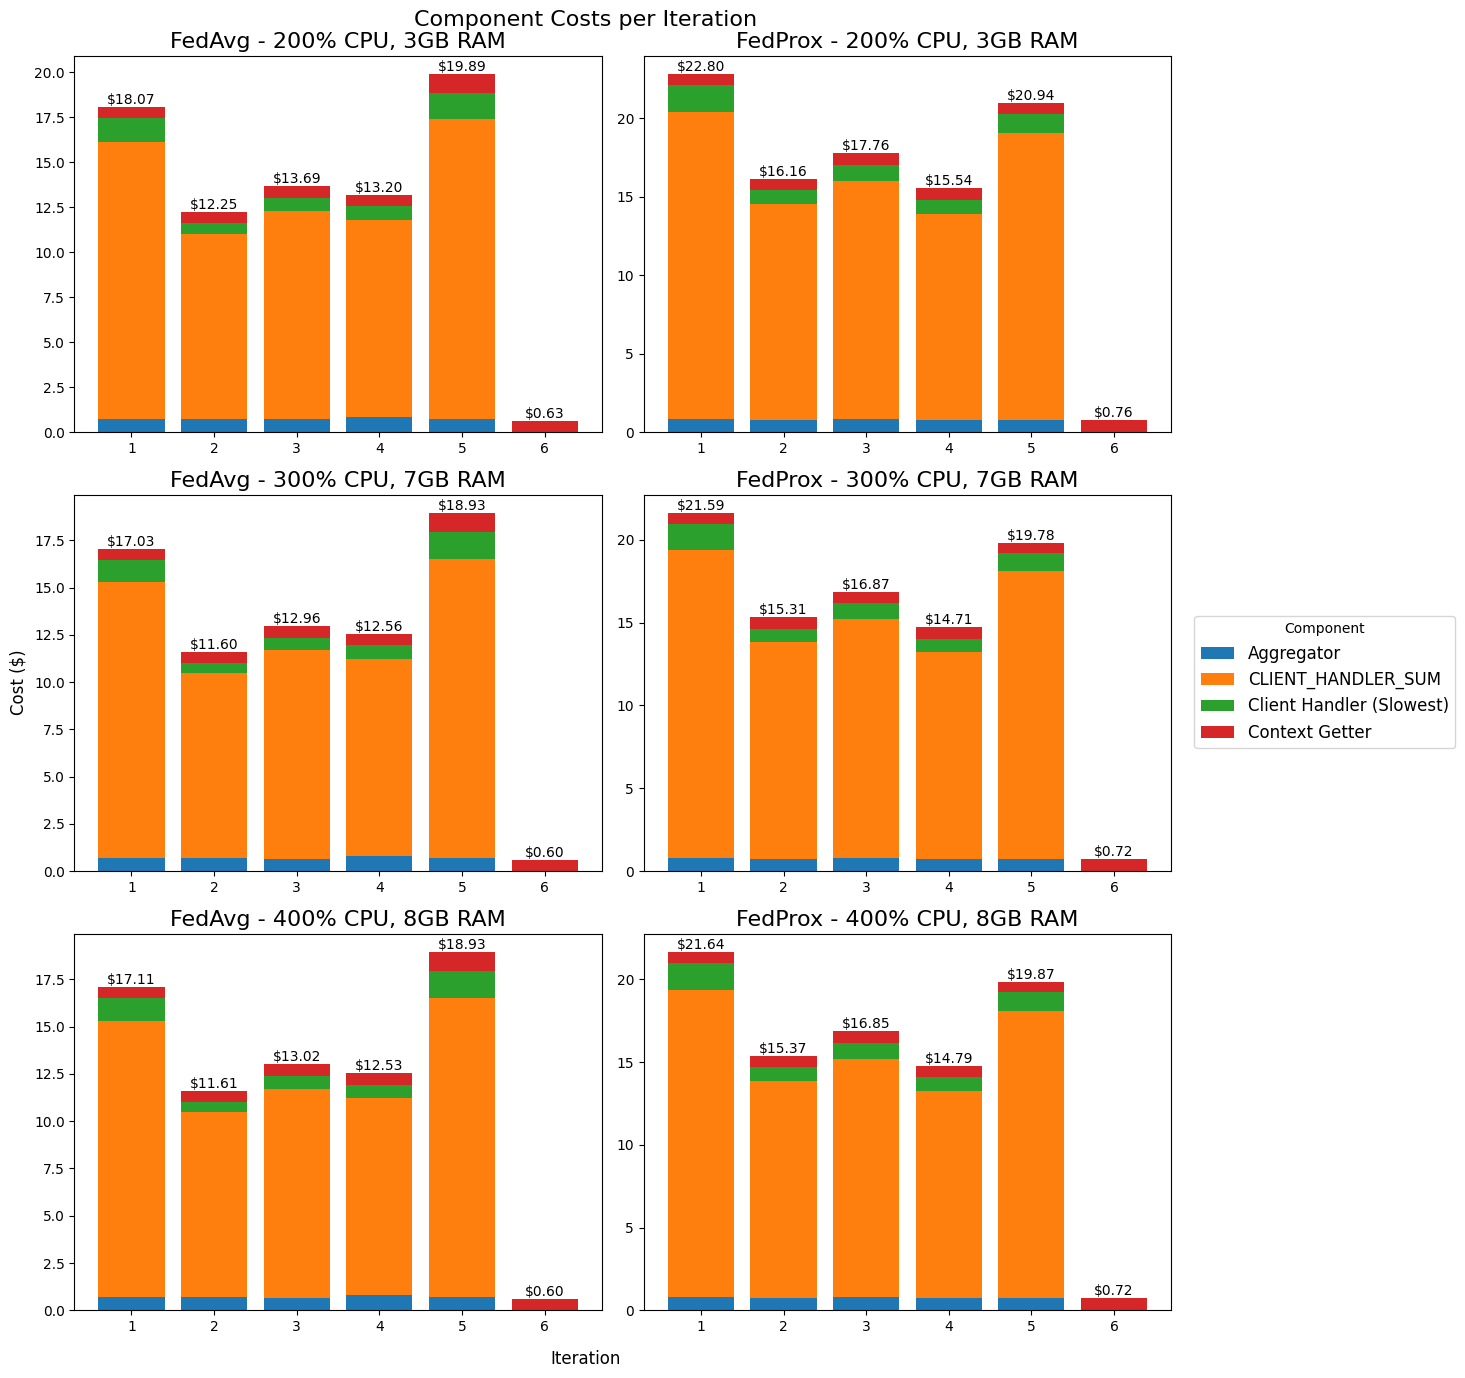

In [45]:
fig, axs = plt.subplots(3, 2, figsize=(12, 14))

rename_dict = {
    "CONTEXT_GETTER": "Context Getter",
    "CLIENT_HANDLER_MAX": "Client Handler (Slowest)",
    "AGGREGATOR": "Aggregator",
}

# df = df[df["component"] != "CLIENT_HANDLER_MAX"]


def graph3(df, ax, title, cost_function):
    df = df[df["operation"] == "RUN"]
    df = df.replace({"component": rename_dict})
    # Pivot the data
    pivot_df = df.pivot(index="iteration", columns="component", values="execution_time")

    # Fill NaN values with 0
    pivot_df = pivot_df.fillna(0)

    # Apply cost function to each value
    cost_df = pivot_df.applymap(cost_function)

    # Create the plot
    bottom = np.zeros(len(cost_df))
    for column in cost_df.columns:
        ax.bar(cost_df.index, cost_df[column], bottom=bottom, label=column)
        bottom += cost_df[column]

    # Add value labels on the bars
    for i, total in enumerate(bottom):
        ax.text(i, total, f"${total:.2f}", ha="center", va="bottom")

    ax.set_title(title, fontsize=16)

    # Print summary statistics
    print(cost_df.describe())

    # Print total cost per component
    print("\nTotal Cost per Component:")
    print(cost_df.sum().sort_values(ascending=False))


# Define your cost function here
cost_function = lambda x: x * 0.1  # Example: $0.1 per second

graph3(fedavg_df, axs[0, 0], "FedAvg - 200% CPU, 3GB RAM", cost_function)
graph3(fedprox_df, axs[0, 1], "FedProx - 200% CPU, 3GB RAM", cost_function)
graph3(fedavg_df_300, axs[1, 0], "FedAvg - 300% CPU, 7GB RAM", cost_function)
graph3(fedprox_df_300, axs[1, 1], "FedProx - 300% CPU, 7GB RAM", cost_function)
graph3(fedavg_df_400, axs[2, 0], "FedAvg - 400% CPU, 8GB RAM", cost_function)
graph3(fedprox_df_400, axs[2, 1], "FedProx - 400% CPU, 8GB RAM", cost_function)

fig.suptitle("Component Costs per Iteration", fontsize=16)
fig.supxlabel("Iteration", fontsize=12)
fig.supylabel("Cost ($)", fontsize=12)
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Component", bbox_to_anchor=(1.00, 0.5), loc="center left", fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)
/tmp/ipykernel_32206/3009904957.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cost_df = pivot_df.applymap(cost_function)



Summary for FedAvg - 200% CPU, 3GB RAM:
component
Aggregator                  0.001878
Client Handler (Average)    0.002429
Client Handlers (All)       0.032451
Context Getter              0.002101
dtype: float64

Summary for FedProx - 200% CPU, 3GB RAM:
component
Aggregator                  0.002077
Client Handler (Average)    0.002912
Client Handlers (All)       0.039878
Context Getter              0.002115
dtype: float64

Summary for FedAvg - 300% CPU, 7GB RAM:
component
Aggregator                  0.004048
Client Handler (Average)    0.004704
Client Handlers (All)       0.073211
Context Getter              0.004756
dtype: float64

Summary for FedProx - 300% CPU, 7GB RAM:
component
Aggregator                  0.004482
Client Handler (Average)    0.006252
Client Handlers (All)       0.091095
Context Getter              0.004792
dtype: float64

Summary for FedAvg - 400% CPU, 8GB RAM:
component
Aggregator                  0.004490
Client Handler (Average)    0.004940
Client Handlers (

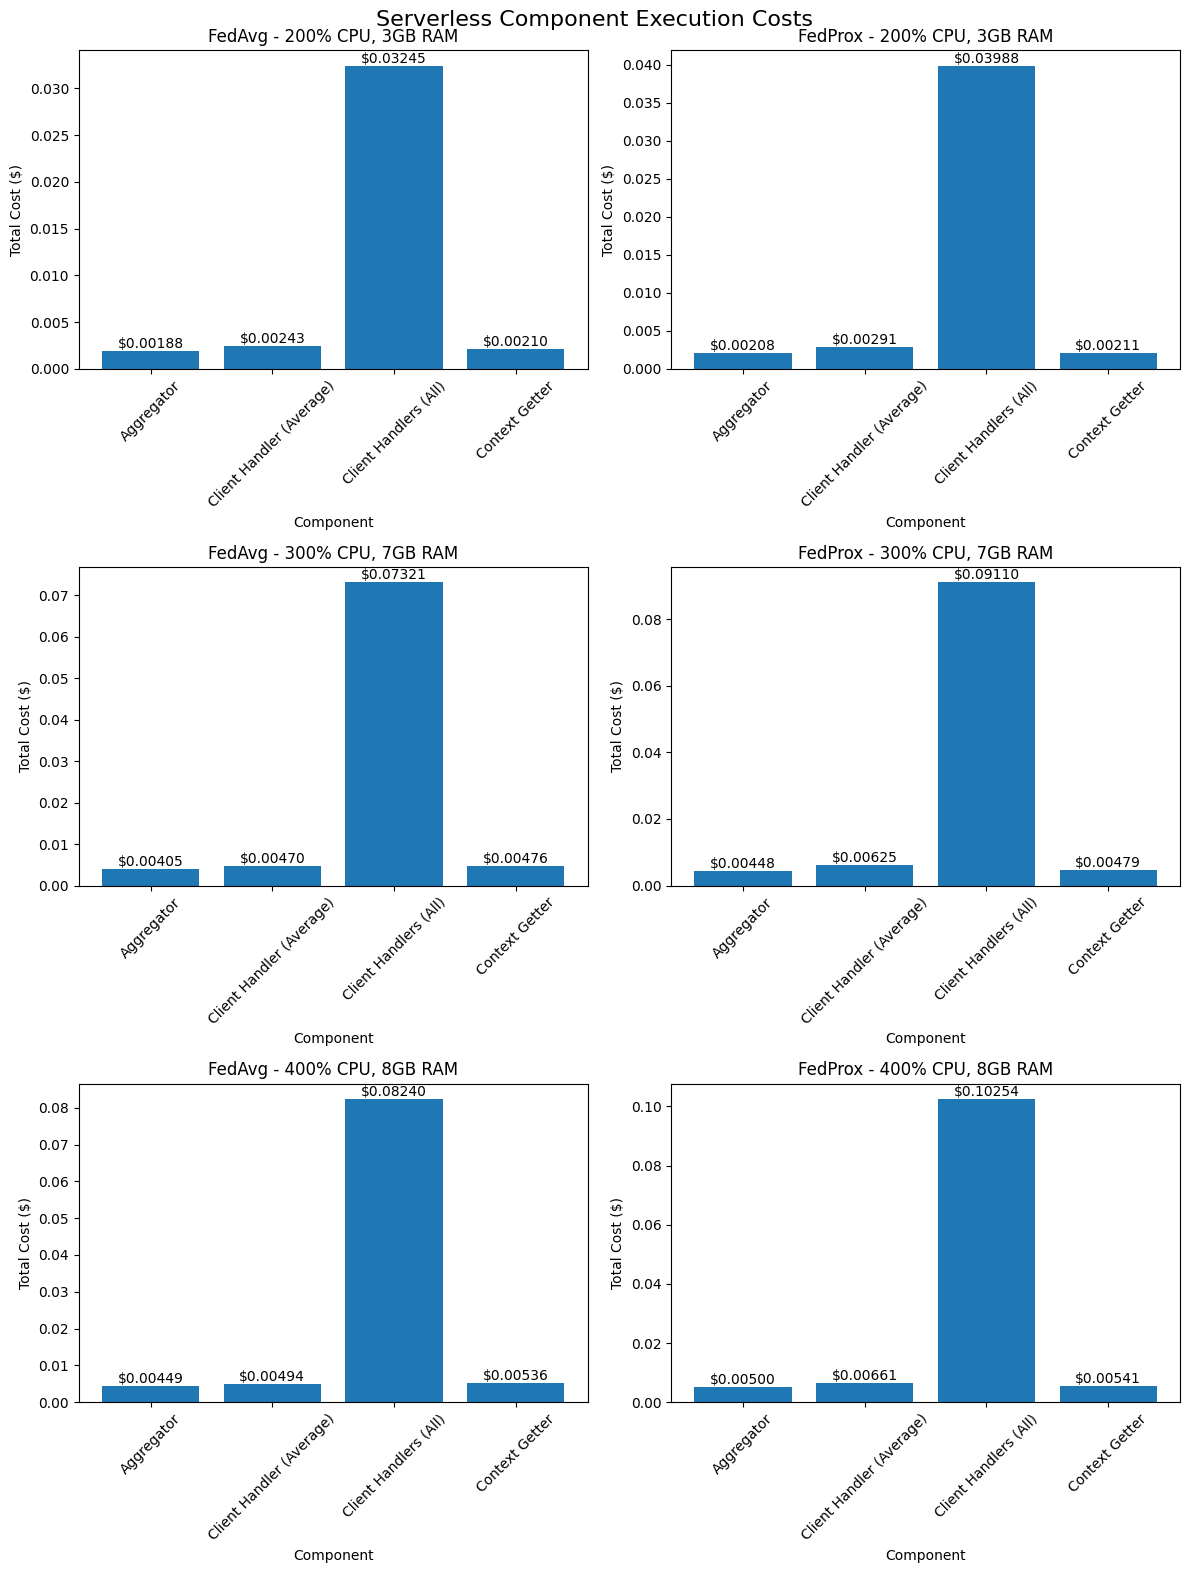

In [71]:
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

rename_dict = {
    "CONTEXT_GETTER": "Context Getter",
    "CLIENT_HANDLER_SUM": "Client Handlers (All)",
    "CLIENT_HANDLER_MAX": "Client Handler (Average)",
    "AGGREGATOR": "Aggregator",
}


def graph4(df, ax, title, cost_function):
    df = df[df["operation"] == "RUN"]
    # df = df[df["component"] != "CLIENT_HANDLER_MAX"]

    df = df.replace({"component": rename_dict})

    # prop_cycle = plt.rcParams['axes.prop_cycle']
    # colors = prop_cycle.by_key()['color']

    # Pivot the data
    pivot_df = df.pivot(
        index="iteration",
        columns="component",
        values="execution_time",
    )

    # Fill NaN values with 0
    pivot_df = pivot_df.fillna(0)

    # Apply cost function to each value
    cost_df = pivot_df.applymap(cost_function)

    # Calculate average cost per component
    avg_cost = cost_df.sum()

    # Create the bar plot
    bars = ax.bar(avg_cost.index, avg_cost.values)

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"${height:.5f}", ha="center", va="bottom")

    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Total Cost ($)")
    ax.set_xlabel("Component")
    ax.tick_params(axis="x", rotation=45)

    # Print summary statistics
    print(f"\nSummary for {title}:")
    print(avg_cost)

    return avg_cost


def cost_function(gb):
    def fn(time):
        return (gb * 16666.7 * time) / 1_000_000_000

    return fn


# Define your cost function here

# Flatten axs to easily iterate over it
axs_flat = axs.flatten()
graph4(fedavg_df, axs[0, 0], "FedAvg - 200% CPU, 3GB RAM", cost_function(3))
graph4(fedprox_df, axs[0, 1], "FedProx - 200% CPU, 3GB RAM", cost_function(3))
graph4(fedavg_df_300, axs[1, 0], "FedAvg - 300% CPU, 7GB RAM", cost_function(7))
graph4(fedprox_df_300, axs[1, 1], "FedProx - 300% CPU, 7GB RAM", cost_function(7))
graph4(fedavg_df_400, axs[2, 0], "FedAvg - 400% CPU, 8GB RAM", cost_function(8))
graph4(fedprox_df_400, axs[2, 1], "FedProx - 400% CPU, 8GB RAM", cost_function(8))

# handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, title="Component", bbox_to_anchor=(1.00, 0.5), loc="center left", fontsize=12)
fig.suptitle("Serverless Component Execution Costs", fontsize=16)
plt.tight_layout()

print(fedavg_df.head())

plt.show()

In [ ]:
fedavg_df[""]

/tmp/ipykernel_32206/3832876474.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serialization_df["operation"] = serialization_df["operation"].map(operation_mapping)
/tmp/ipykernel_32206/3832876474.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serialization_df["component"] = serialization_df["component"].map(rename_dict)
/tmp/ipykernel_32206/3832876474.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plot = sns.barplot(x="component", y="ex

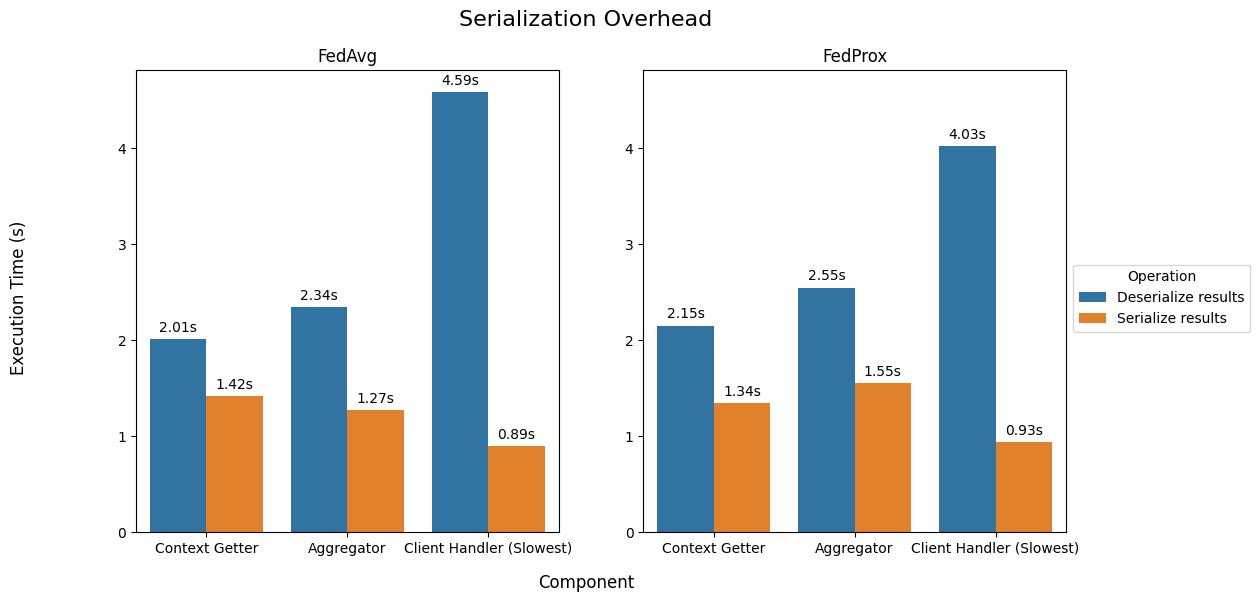

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


operation_mapping = {
    "SAVE_OUTPUT": "Serialize results",
    "GET_INPUT": "Deserialize results",
}

rename_dict = {
    "CONTEXT_GETTER": "Context Getter",
    "CLIENT_HANDLER_MAX": "Client Handler (Slowest)",
    "AGGREGATOR": "Aggregator",
}


def draw_serialization_overhead(df: pd.DataFrame, ax, title):
    serialization_df = df[df["operation"].isin(["GET_INPUT", "SAVE_OUTPUT"])]

    # rename operations
    serialization_df["operation"] = serialization_df["operation"].map(operation_mapping)

    # rename components
    serialization_df["component"] = serialization_df["component"].map(rename_dict)

    # data = serialization_df.groupby(["component", "operation"])["execution_time"].mean()
    plot = sns.barplot(x="component", y="execution_time", hue="operation", data=serialization_df, ax=ax, ci=0)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title)
    for container in plot.containers:
        ax.bar_label(container, fmt="%.2fs", padding=3)


draw_serialization_overhead(fedavg_df, axs[0], "FedAvg")
draw_serialization_overhead(fedprox_df, axs[1], "FedProx")
fig.suptitle("Serialization Overhead", fontsize=16)
fig.supxlabel("Component", fontsize=12)
fig.supylabel("Execution Time (s)", fontsize=12)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Operation", loc="center left", bbox_to_anchor=(0.9, 0.5))
axs[0]._remove_legend(axs[0].legend_), axs[1]._remove_legend(axs[1].legend_)
axs[1].set_ylim(axs[0].get_ylim())

fig.show()

/tmp/ipykernel_32206/1853870714.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plot = sns.barplot(x="component", y="percentage", hue="operation", data=df, ax=ax, ci=0)
/tmp/ipykernel_32206/1853870714.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  plot = sns.barplot(x="component", y="percentage", hue="operation", data=df, ax=ax, ci=0)
/tmp/ipykernel_32206/1853870714.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


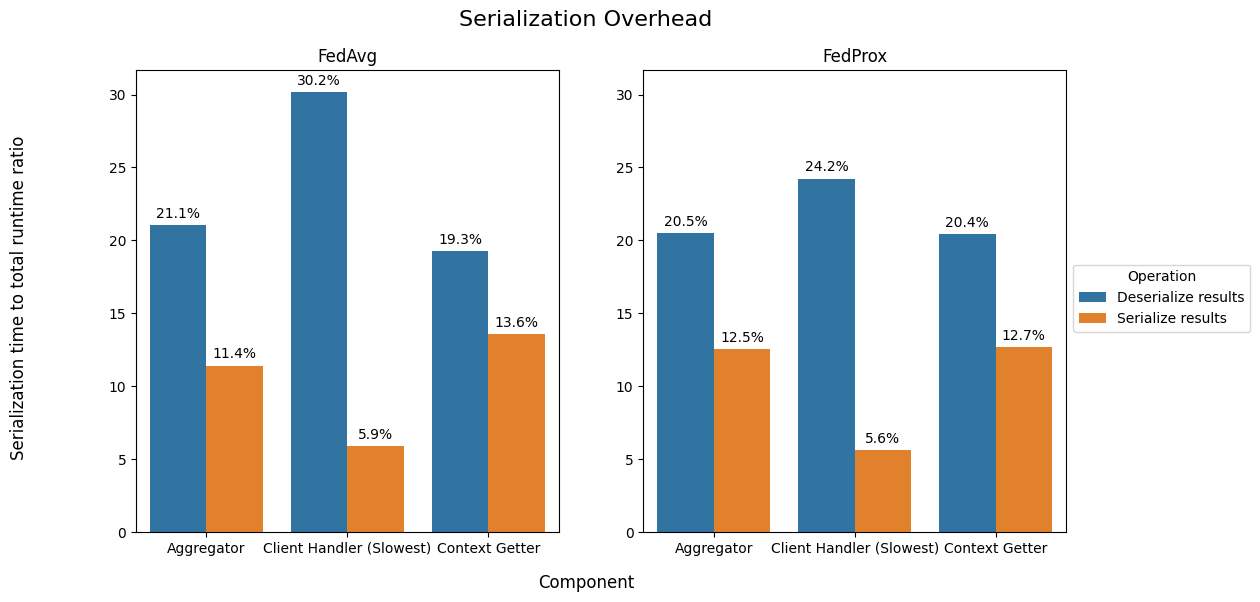

In [14]:
def preprocess_data(df: pd.DataFrame):
    # Filter for relevant operations
    df_filtered = df[df["operation"].isin(["GET_INPUT", "SAVE_OUTPUT", "RUN"])]

    # Group by component and calculate percentages
    df_grouped = df_filtered.groupby(["component", "operation"])["execution_time"].mean().unstack()
    df_grouped["TOTAL"] = df_grouped["GET_INPUT"] + df_grouped["SAVE_OUTPUT"] + df_grouped["RUN"]
    df_grouped["GET_INPUT_PCT"] = df_grouped["GET_INPUT"] / df_grouped["TOTAL"] * 100
    df_grouped["SAVE_OUTPUT_PCT"] = df_grouped["SAVE_OUTPUT"] / df_grouped["TOTAL"] * 100

    # Reshape data for plotting
    df_plot = df_grouped.reset_index()
    df_plot = pd.melt(
        df_plot,
        id_vars=["component"],
        value_vars=["GET_INPUT_PCT", "SAVE_OUTPUT_PCT"],
        var_name="operation",
        value_name="percentage",
    )
    df_plot["operation"] = df_plot["operation"].map({"GET_INPUT_PCT": "GET_INPUT", "SAVE_OUTPUT_PCT": "SAVE_OUTPUT"})
    df_plot["component"] = df_plot["component"].map(rename_dict)
    df_plot["operation"] = df_plot["operation"].map(operation_mapping)

    return df_plot


def draw_serialization_overhead2(df: pd.DataFrame, ax, title):
    # Create the plot and store the returned artists
    plot = sns.barplot(x="component", y="percentage", hue="operation", data=df, ax=ax, ci=0)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title)

    # Add value labels on top of bars
    for container in plot.containers:
        ax.bar_label(container, fmt="%.1f%%", padding=3)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
draw_serialization_overhead2(preprocess_data(fedavg_df), axs[0], "FedAvg")
draw_serialization_overhead2(preprocess_data(fedprox_df), axs[1], "FedProx")
fig.suptitle("Serialization Overhead", fontsize=16)
fig.supxlabel("Component", fontsize=12)
fig.supylabel("Serialization time to total runtime ratio", fontsize=12)
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Operation", loc="center left", bbox_to_anchor=(0.9, 0.5))
axs[0]._remove_legend(axs[0].legend_), axs[1]._remove_legend(axs[1].legend_)
axs[1].set_ylim(axs[0].get_ylim())
fig.show()

/tmp/ipykernel_5385/3556534164.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")  # You can change 'tab10' to other colormaps like 'Set3', 'Paired', etc.


TypeError: unhashable type: 'numpy.ndarray'

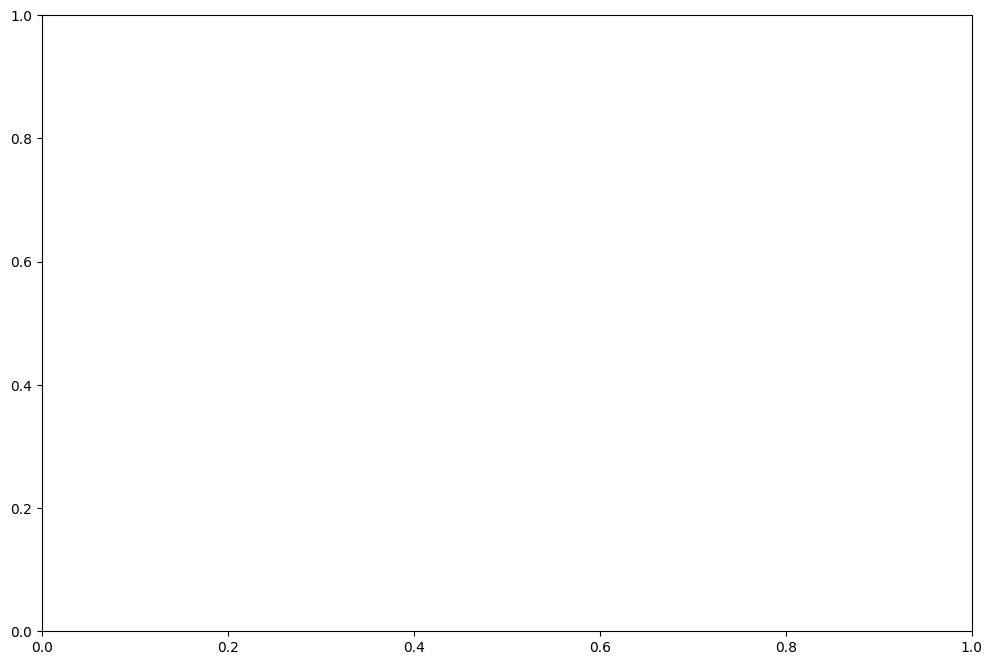

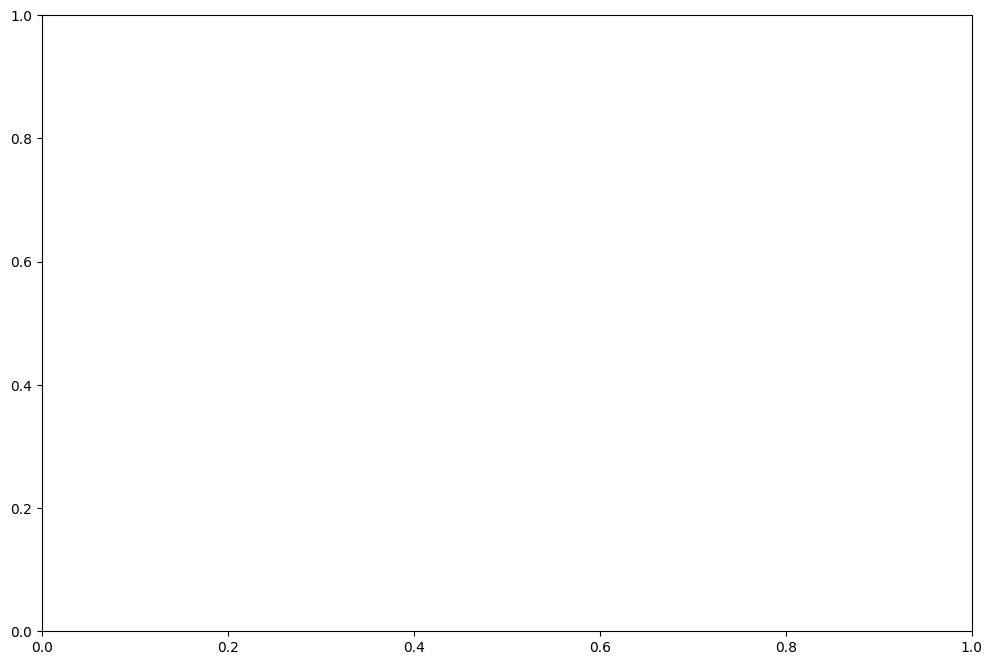

In [66]:
# from matplotlib.cm import get_cmap

# rename_dict = {
#     "CONTEXT_GETTER": "Context Getter",
#     "CLIENT_HANDLER_MAX": "Client Handler (Slowest)",
#     "AGGREGATOR": "Aggregator",
# }


# def serverless_runtime(df):
#     fig, ax = plt.subplots(figsize=(12, 8))

#     run_df = df[df["function_name"].str.startswith("RUN:")]

#     # client_handlers_avg = run_df[run_df["component"] == "CLIENT_HANDLER_MAX"]["execution_time"].mean()

#     run_df.index = run_df.index.map(rename_dict)
#     # run_df = run_df.sort_values(ascending=False)

#     # Create the plot
#     fig, ax = plt.subplots(figsize=(12, 8))

#     cmap = get_cmap("tab10")  # You can change 'tab10' to other colormaps like 'Set3', 'Paired', etc.

#     # Create the bar chart with different colors
#     bars = ax.bar(
#         run_df.index,
#         run_df.values,
#         color=[cmap(i) for i in range(len(run_df))],
#     )

#     # Customize the plot
#     ax.set_xlabel("Component", fontsize=12)
#     ax.set_ylabel("Average Execution Time (s)", fontsize=12)
#     ax.set_title("Average Component Execution Times Across All Iterations", fontsize=16)
#     plt.xticks(rotation=45, ha="right")

#     # Add value labels on the bars
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.4f}s", ha="center", va="bottom")

#     plt.tight_layout()
#     plt.show()


# serverless_runtime(fedavg_df)

In [67]:
from matplotlib.cm import get_cmap

df = fedavg_df

run_df = df[df["function_name"].str.startswith("RUN:")]

client_handlers_max = run_df[run_df["component"] == "CLIENT_HANDLER"].groupby("iteration")["execution_time"].max()
client_handlers_avg = client_handlers_max.mean()

# Calculate average execution times for other components
other_components_avg = run_df[run_df["component"] != "CLIENT_HANDLER"].groupby("component")["execution_time"].mean()

# Combine client handlers with other components
all_components_avg = other_components_avg.append(pd.Series({"CLIENT_HANDLER_MAX": client_handlers_avg}))

rename_dict = {
    "CONTEXT_GETTER": "Context Getter",
    "CLIENT_HANDLER_MAX": "Client Handler (Slowest)",
    "AGGREGATOR": "Aggregator",
}

all_components_avg.index = all_components_avg.index.map(rename_dict)


# Sort components by average execution time
all_components_avg_sorted = all_components_avg.sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

cmap = get_cmap("tab10")  # You can change 'tab10' to other colormaps like 'Set3', 'Paired', etc.

# Create the bar chart with different colors
bars = ax.bar(
    all_components_avg_sorted.index,
    all_components_avg_sorted.values,
    color=[cmap(i) for i in range(len(all_components_avg_sorted))],
)


# Customize the plot
ax.set_xlabel("Component", fontsize=12)
ax.set_ylabel("Average Execution Time (s)", fontsize=12)
ax.set_title("Average Component Execution Times Across All Iterations", fontsize=16)
plt.xticks(rotation=45, ha="right")

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.4f}s", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# Print average execution times
print("Average Execution Times per Component:")
print(all_components_avg_sorted)

# Calculate and print the percentage of total time for each component
total_time = all_components_avg_sorted.sum()
percentages = (all_components_avg_sorted / total_time) * 100

print("\nPercentage of Total Execution Time:")
for component, percentage in percentages.items():
    print(f"{component}: {percentage:.2f}%")

AttributeError: 'Series' object has no attribute 'append'

In [68]:
# Filter for SAVE_OUTPUT and GET_INPUT operations
io_df = df[df["operation"].isin(["SAVE_OUTPUT", "GET_INPUT"])]


# Function to get average time (max for CLIENT_HANDLER)
def get_avg_time(group):
    if group.name == "CLIENT_HANDLER":
        return group.groupby(["iteration", "operation"])["execution_time"].max().groupby("operation").mean()
    else:
        return group.groupby("operation")["execution_time"].mean()


# Calculate average times
avg_times = io_df.groupby("component").apply(get_avg_time)

print(avg_times)

# Rename columns and index
column_rename = {"GET_INPUT": "Deserialization", "SAVE_OUTPUT": "Serialization"}
avg_times.columns = [column_rename.get(col, col) for col in avg_times.columns]
avg_times.index = avg_times.index.map(
    {"CONTEXT_GETTER": "Context Getter", "CLIENT_HANDLER": "Client Handler", "AGGREGATOR": "Aggregator"}
)


# Sort by total time (descending)
avg_times["Total"] = avg_times["Deserialization"] + avg_times["Serialization"]
avg_times_sorted = avg_times.sort_values("Total", ascending=False).drop("Total", axis=1)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars and positions of the bars on X axis
barWidth = 0.35
r1 = np.arange(len(avg_times_sorted))
r2 = [x + barWidth for x in r1]

# Create bars
deserialization_bars = ax.bar(
    r1, avg_times_sorted["Deserialization"], color="skyblue", width=barWidth, label="Deserialization (GET_INPUT)"
)
serialization_bars = ax.bar(
    r2, avg_times_sorted["Serialization"], color="lightgreen", width=barWidth, label="Serialization (SAVE_OUTPUT)"
)

# Customize the plot
ax.set_xlabel("Component", fontsize=12)
ax.set_ylabel("Average Time (s)", fontsize=12)
ax.set_title("Average Serialization and Deserialization Time by Component (in seconds)", fontsize=16)
ax.set_xticks([r + barWidth / 2 for r in range(len(avg_times_sorted))])
ax.set_xticklabels(avg_times_sorted.index, rotation=45, ha="right")
ax.legend()


# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.4f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(deserialization_bars)
autolabel(serialization_bars)

plt.tight_layout()
plt.show()

# Print the average times
print("Average Serialization and Deserialization Times (in seconds):")
print(avg_times_sorted)

# Calculate and print the total overhead and percentage for each component
avg_times_sorted["Total Overhead"] = avg_times_sorted.sum(axis=1)
total_overhead = avg_times_sorted["Total Overhead"].sum()
avg_times_sorted["Percentage of Total Overhead"] = (avg_times_sorted["Total Overhead"] / total_overhead) * 100

print("\nTotal Overhead and Percentage by Component:")
print(avg_times_sorted[["Total Overhead", "Percentage of Total Overhead"]])
print(f"\nTotal Overhead Across All Components: {total_overhead:.4f} seconds")

Empty DataFrame
Columns: [function_name, execution_time, operation, component, iteration, operation_component]
Index: []


/tmp/ipykernel_5385/3254179586.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_times = io_df.groupby("component").apply(get_avg_time)


KeyError: 'Deserialization'

/home/pdymara/.cache/pypoetry/virtualenvs/pfl-benchmarks-1et6TfbS-py3.10/lib/python3.10/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


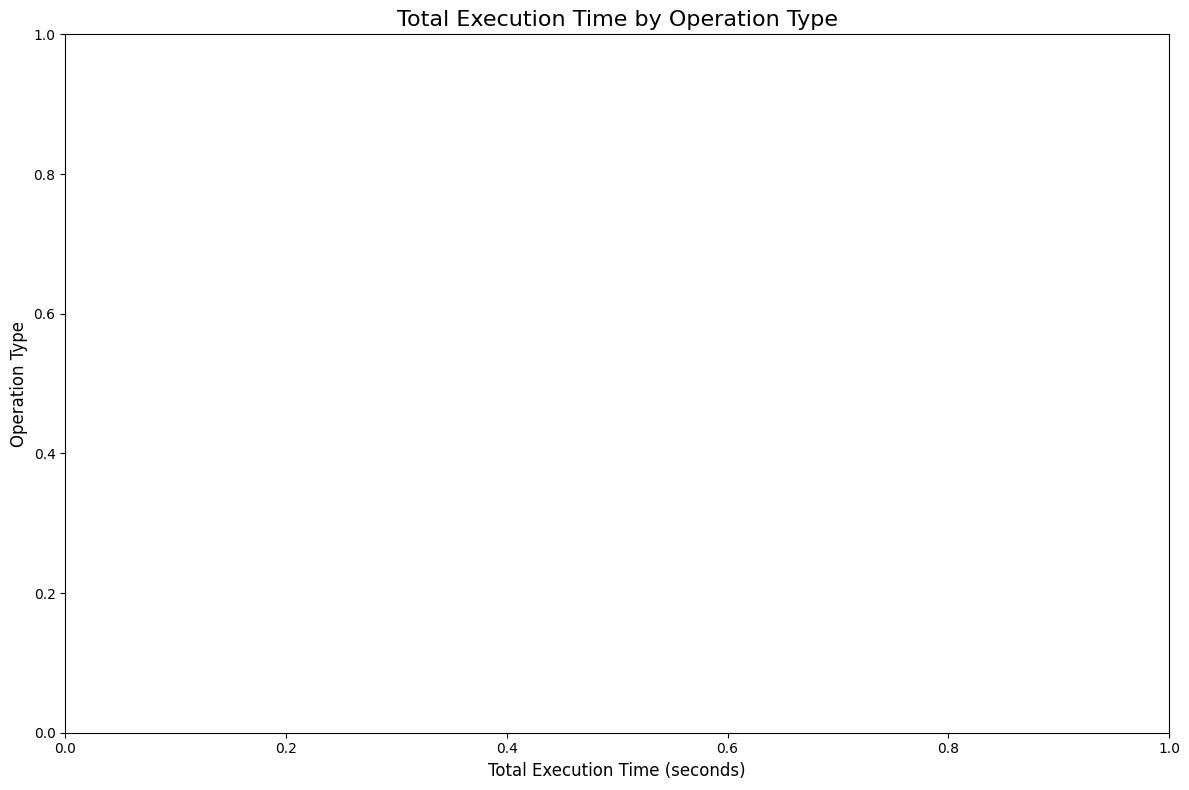

Series([], Name: execution_time, dtype: float64)


In [69]:
# Filter out 'RUN' and 'ITERATION'
df_filtered = df[~df["operation"].isin(["RUN", "ITERATION"])]

# Define a mapping for operation names
operation_mapping = {
    "SAVE_INPUT": "Save Input",
    "GET_INPUT": "Get Input",
    "CALL_FN": "Call Function",
    "SAVE_OUTPUT": "Save Output",
    "GET_OUTPUT": "Get Output",
}

# Apply the mapping to the operation column
df_filtered["operation"] = df_filtered["operation"].map(operation_mapping)

# Group by operation and sum the execution times
operation_times = df_filtered.groupby("operation")["execution_time"].sum().sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=operation_times.values, y=operation_times.index, orient="h", palette="viridis")

plt.title("Total Execution Time by Operation Type", fontsize=16)
plt.xlabel("Total Execution Time (seconds)", fontsize=12)
plt.ylabel("Operation Type", fontsize=12)

# Add value labels to the end of each bar
for i, v in enumerate(operation_times.values):
    plt.text(v, i, f" {v:.2f}s", va="center", fontsize=10)

plt.tight_layout()
plt.show()

# Print the total execution time for each operation type
print(operation_times)

/tmp/ipykernel_5385/1220090784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df["component"] = run_df["function_name"].apply(lambda x: x.split(":")[1])
/tmp/ipykernel_5385/1220090784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df["iteration"] = run_df["function_name"].apply(lambda x: x.split(":")[2])


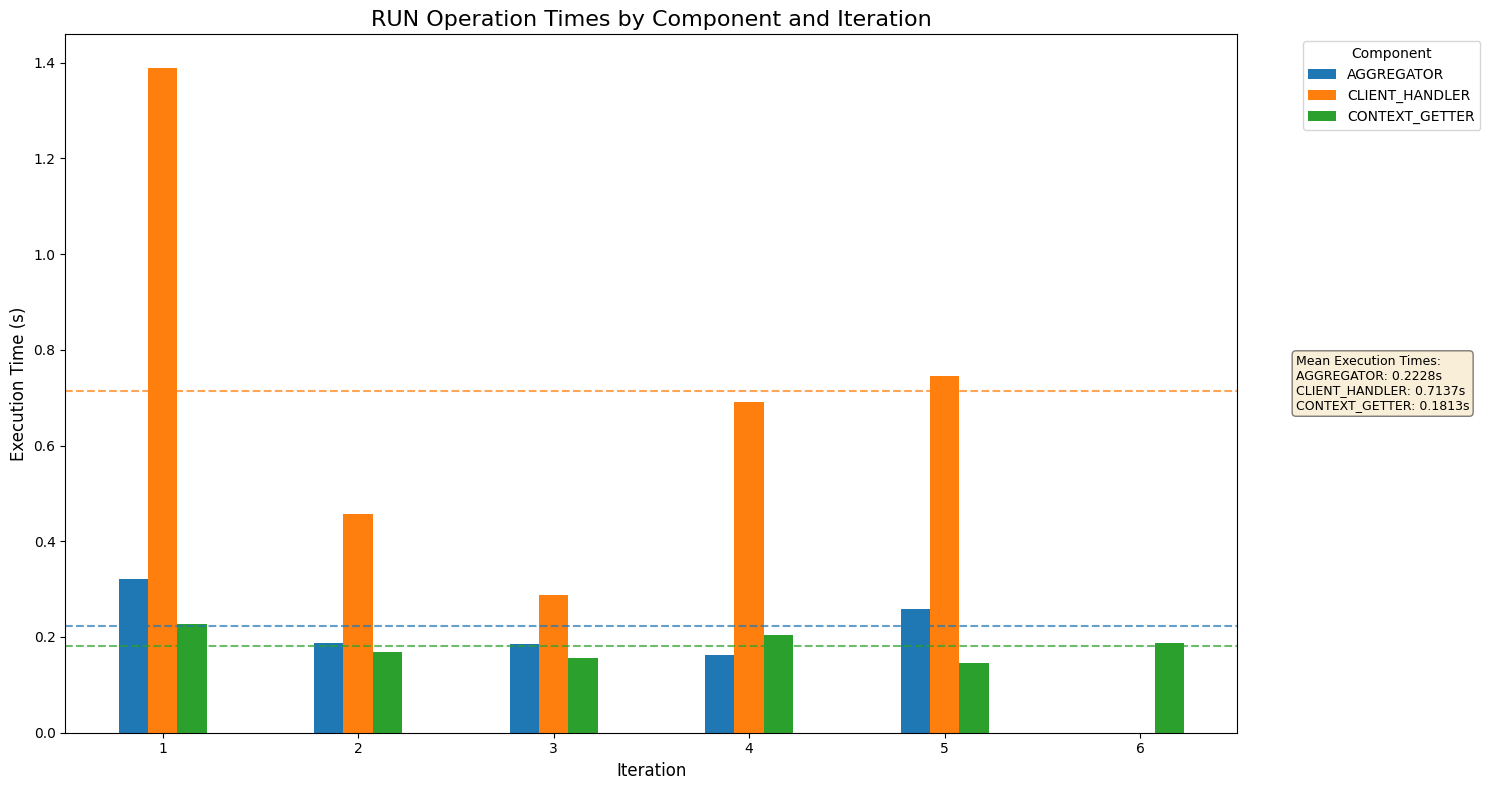

component  AGGREGATOR  CLIENT_HANDLER  CONTEXT_GETTER
iteration                                            
1            0.321646        1.389566        0.228022
2            0.187268        0.456127        0.168278
3            0.185329        0.286952        0.155265
4            0.162070        0.691113        0.203938
5            0.257819        0.744704        0.145346
6                 NaN             NaN        0.186686

Mean Execution Times:
component
AGGREGATOR        0.222826
CLIENT_HANDLER    0.713692
CONTEXT_GETTER    0.181256
dtype: float64


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("execution_times.csv")

# Filter for RUN operations
run_df = df[df["function_name"].str.startswith("RUN:")]

# Extract component and iteration
run_df["component"] = run_df["function_name"].apply(lambda x: x.split(":")[1])
run_df["iteration"] = run_df["function_name"].apply(lambda x: x.split(":")[2])

# For CLIENT_HANDLER, keep only the maximum time for each iteration
client_handler_max = (
    run_df[run_df["component"] == "CLIENT_HANDLER"].groupby("iteration")["execution_time"].max().reset_index()
)
client_handler_max["component"] = "CLIENT_HANDLER"

# Combine the CLIENT_HANDLER max times with other components
run_df_cleaned = pd.concat([run_df[run_df["component"] != "CLIENT_HANDLER"], client_handler_max])

# Pivot the data
pivot_df = run_df_cleaned.pivot(index="iteration", columns="component", values="execution_time")

# Calculate mean execution times
mean_times = pivot_df.mean()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Set the width of each bar and the positions of the bars
width = 0.15
x = np.arange(len(pivot_df.index))

# Plot bars for each component
for i, component in enumerate(pivot_df.columns):
    ax.bar(x + i * width, pivot_df[component], width, label=component)

# Plot mean lines
for i, (component, mean_time) in enumerate(mean_times.items()):
    ax.axhline(y=mean_time, color=plt.cm.tab10(i), linestyle="--", alpha=0.7)

# Customize the plot
ax.set_xlabel("Iteration", fontsize=12)
ax.set_ylabel("Execution Time (s)", fontsize=12)
ax.set_title("RUN Operation Times by Component and Iteration", fontsize=16)
ax.set_xticks(x + width * (len(pivot_df.columns) - 1) / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title="Component", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add a text box with mean times
meantext = "Mean Execution Times:\n" + "\n".join(
    [f"{component}: {time:.4f}s" for component, time in mean_times.items()]
)
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
ax.text(1.05, 0.5, meantext, transform=ax.transAxes, fontsize=9, verticalalignment="center", bbox=props)

plt.tight_layout()
plt.show()

# Print the data
print(pivot_df)
print("\nMean Execution Times:")
print(mean_times)

In [72]:
df = pd.read_csv("./analiza/200/time_2024-08-31_15-29-48.csv")

df

array(['SAVE_INPUT', 'GET_INPUT', 'CALL_FN', 'SAVE_OUTPUT', 'GET_OUTPUT',
       'RUN'], dtype=object)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))


def get_all_iteration_time(df):
    # Filter for RUN operations
    run_df = df[df["operation"] == "ITERATION"]

    # Extract component and iteration
    run_df["component"] = run_df["function_name"].apply(lambda x: x.split(":")[1])
    run_df["iteration"] = run_df["function_name"].apply(lambda x: x.split(":")[2])

    # For CLIENT_HANDLER, keep only the maximum time for each iteration
    client_handler_max = (
        run_df[run_df["component"] == "CLIENT_HANDLER"].groupby("iteration")["execution_time"].max().reset_index()
    )
    client_handler_max["component"] = "CLIENT_HANDLER"

    # Combine the CLIENT_HANDLER max times with other components
    run_df_cleaned = pd.concat([run_df[run_df["component"] != "CLIENT_HANDLER"], client_handler_max])

    # Pivot the data
    pivot_df = run_df_cleaned.pivot(index="iteration", columns="component", values="execution_time")

    # Calculate mean execution times
    mean_times = pivot_df.mean()

    return pivot_df, mean_times

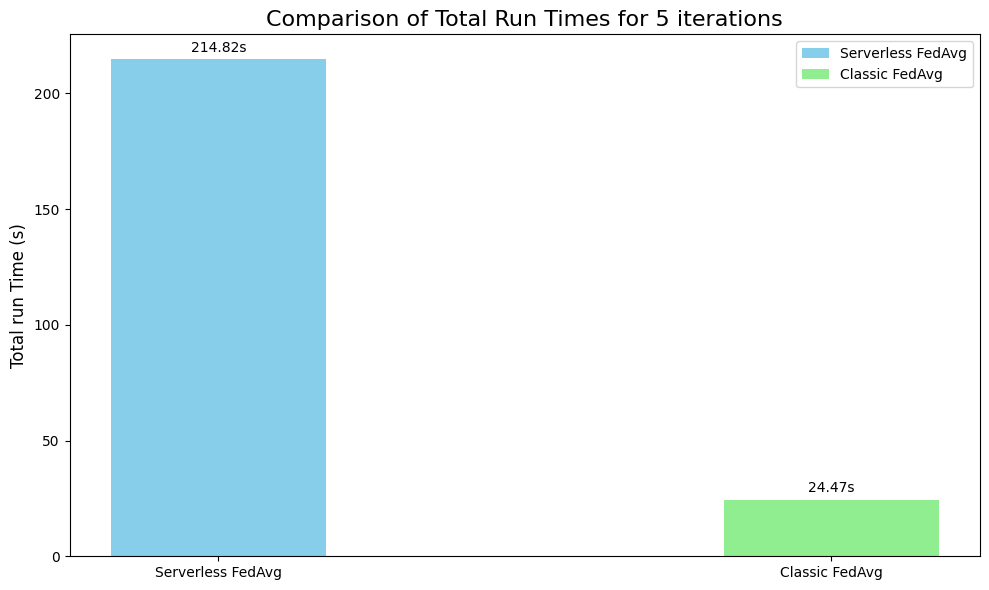

Total Iteration Time (File 1): 214.82 seconds
Total Iteration Time (File 2): 24.47 seconds
Percentage Difference: -88.61%


In [72]:
def process_csv(file_path):
    df = pd.read_csv(file_path)
    iteration_times = df[df["function_name"].str.startswith("ITERATION:")]["execution_time"]
    return iteration_times.sum()


# File paths
file1 = "execution_times.csv"  # Replace with your first file path
file2 = "original.csv"  # Replace with your second file path

# Process both files
time1 = process_csv(file1)
time2 = process_csv(file2)

# Calculate percentage difference
percent_diff = ((time2 - time1) / time1) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the positions of the bars
width = 0.35
x = np.arange(2)

# Plot bars
bars1 = ax.bar(x[0], time1, width, label="Serverless FedAvg", color="skyblue")
bars2 = ax.bar(x[1], time2, width, label="Classic FedAvg", color="lightgreen")

# Customize the plot
ax.set_ylabel("Total run Time (s)", fontsize=12)
ax.set_title("Comparison of Total Run Times for 5 iterations", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(["Serverless FedAvg", "Classic FedAvg"])
ax.legend()


# Add value labels on the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}s",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(bars1)
autolabel(bars2)

# Add percentage difference
# ax.annotate(f'{percent_diff:.2f}% difference',
#             xy=(0.5, max(time1, time2)),
#             xytext=(0, 10),  # 10 points vertical offset
#             textcoords="offset points",
#             ha='center', va='bottom',
#             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print the results
print(f"Total Iteration Time (File 1): {time1:.2f} seconds")
print(f"Total Iteration Time (File 2): {time2:.2f} seconds")
print(f"Percentage Difference: {percent_diff:.2f}%")

PONIŻĘJ NIE DZIALA

In [ ]:
# Extract component and iteration from function_name
df["component"] = df["function_name"].apply(lambda x: x.split(":")[1])
df["iteration"] = df["function_name"].apply(lambda x: x.split(":")[2])

# Convert iteration to numeric type
df["iteration"] = pd.to_numeric(df["iteration"], errors="coerce")

# 1. Average execution time per component
plt.figure(figsize=(12, 6))
sns.barplot(x="component", y="execution_time", data=df)
plt.title("Average Execution Time per Component")
plt.xlabel("Component")
plt.ylabel("Execution Time (s)")
plt.xticks(rotation=45)
plt.show()

: 

In [ ]:
# 2. Execution time comparison across iterations for AGGREGATOR
aggregator_df = df[df["component"] == "AGGREGATOR"]
plt.figure(figsize=(12, 6))
sns.lineplot(x="iteration", y="execution_time", data=aggregator_df)
plt.title("AGGREGATOR Execution Time Across Iterations")
plt.xlabel("Iteration")
plt.ylabel("Execution Time (s)")
plt.show()

: 

In [ ]:
# 3. Distribution of execution times for CLIENT_HANDLER
client_handler_df = df[df["component"] == "CLIENT_HANDLER"]
plt.figure(figsize=(12, 6))
sns.boxplot(x="iteration", y="execution_time", data=client_handler_df)
plt.title("Distribution of CLIENT_HANDLER Execution Times")
plt.xlabel("Iteration")
plt.ylabel("Execution Time (s)")
plt.show()

# 4. Cumulative execution time per iteration
pivot_df = df.pivot_table(values="execution_time", index="iteration", columns="component", aggfunc="sum")
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Cumulative Execution Time per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Execution Time (s)")
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 5. Heatmap of execution times
pivot_df = df.pivot_table(values="execution_time", index="iteration", columns="component", aggfunc="mean")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Heatmap of Execution Times")
plt.show()

# 6. Execution time trends for all components
plt.figure(figsize=(12, 6))
for component in df["component"].unique():
    component_df = df[df["component"] == component]
    sns.lineplot(x="iteration", y="execution_time", data=component_df, label=component)
plt.title("Execution Time Trends for All Components")
plt.xlabel("Iteration")
plt.ylabel("Execution Time (s)")
plt.legend(title="Component")
plt.show()

# 7. Correlation between components
pivot_df = df.pivot_table(values="execution_time", index="iteration", columns="component", aggfunc="mean")
correlation = pivot_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Between Components")
plt.show()

# Print summary statistics
print(df.groupby("component")["execution_time"].describe())

: 